In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape #the shape of the immages 28*28 pixels

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

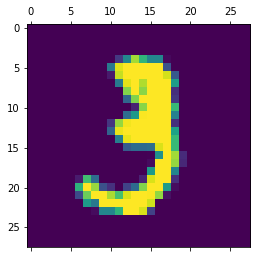

In [7]:
plt.matshow(X_train[10])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

X_train contains 60,000 training images’ data each of size 28x28 and y_train contains their corresponding labels. Similarly, X_test contains 10,000 testing images’ data each of dimension 28x28 and y_test contains their corresponding labels

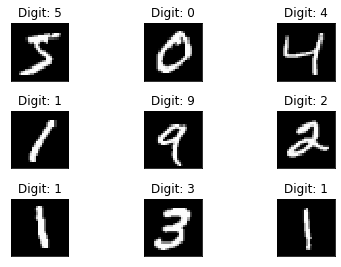

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [53]:
# scaling the data is required
X_train = X_train/255
X_test = X_test/255

In [12]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100,activation='relu'),
         keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
)
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2766 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1208 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0832 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0631 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0484 - accuracy: 0.9854


In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9765


[0.07695438712835312, 0.9764999747276306]

In [14]:
y_predict=model.predict(X_test)

In [15]:
y_predict[0]

array([6.4931810e-03, 9.1446105e-05, 1.6522056e-01, 9.7534978e-01,
       9.7316624e-06, 2.2256374e-04, 2.0731437e-07, 9.9998105e-01,
       2.5515556e-03, 2.0450291e-01], dtype=float32)

In [16]:
np.argmax(y_predict[0])

7

In [17]:
y_predict_labels =[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

Text(141.0, 0.5, 'Truth')

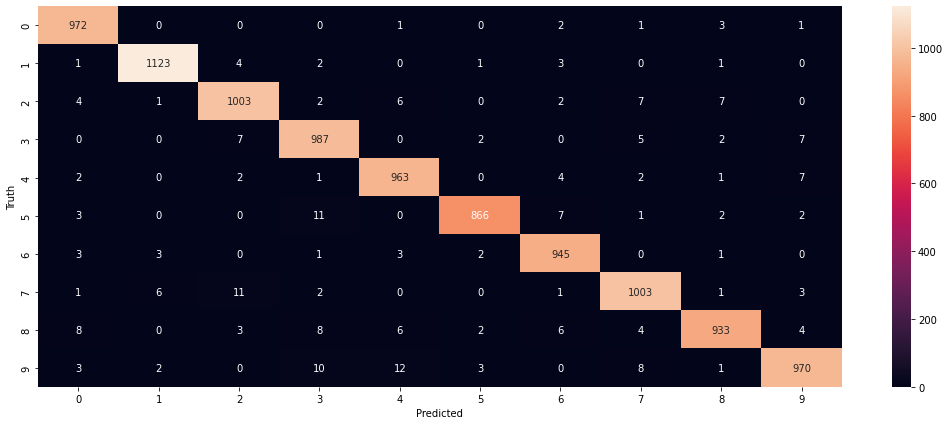

In [20]:
import seaborn as sn
plt.figure(figsize = (18,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using the convolutional neural network for the above dataset

In [28]:
from tensorflow.keras import layers, models

In [54]:
X_train = X_train.reshape(-1,28,28,1)    #training set
X_test = X_test.reshape(-1,28,28,1)    #testing set
#we should convert the 2-d matrix to a 1-d array

In [56]:
cnn = models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu',input_shape=(28,28,1)),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(100,activation='relu'),
      layers.Dense(10,activation='softmax')                   
])

cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [57]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4968 - accuracy: 0.8666
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2247 - accuracy: 0.9336
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1717 - accuracy: 0.9483
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1398 - accuracy: 0.9577
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1182 - accuracy: 0.9642


In [58]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1054 - accuracy: 0.9686


[0.10540565103292465, 0.9685999751091003]

In [59]:
y_predict=cnn.predict(X_test)

In [60]:
y_predict_labels =[np.argmax(i) for i in y_predict]

In [61]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_labels)

Text(141.0, 0.5, 'Truth')

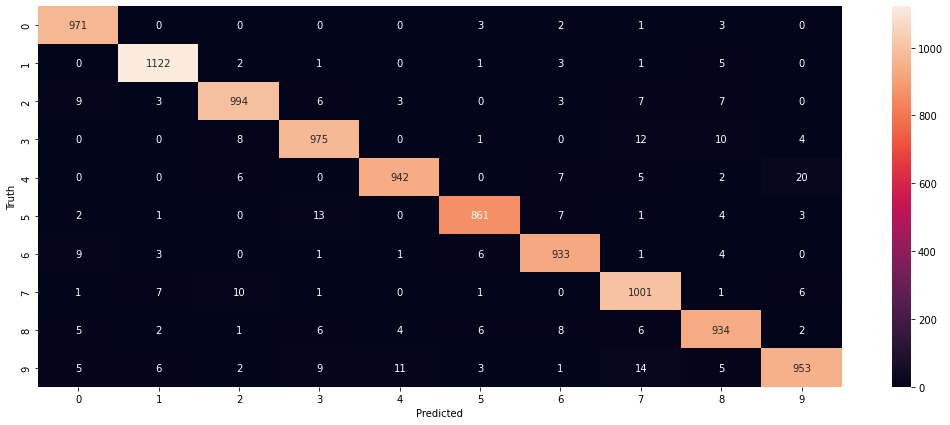

In [62]:
import seaborn as sn
plt.figure(figsize = (18,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Try to run above code for the following composition and check if the accuracy is improved. Predict the corresponding results

In [ ]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])